<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/didactica_ciencia_datos/blob/main/referentes/geron/part_1/c_3/c_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Motivación

<img src = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRlmSyuPT_xv-fLFng-JLVqDx0sr4WWyNnbgg&usqp=CAU'>

La medición de variables climáticas se trabaja para que esté al alcance de todos. 

<img src = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSoHB32jWWwAwMoiZ07IEOc4v6zO3AbN9S7Bw&usqp=CAU'>

<img src = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTycGIsUnfD6F-0t-YnVCa_r-Aer3ifid6t-Q&usqp=CAU'>

<img src = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcROTTHsh6iGVWdnol9W6fRf-0tLMKNIMwpEUg&usqp=CAU'>

<img src = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRH5Sn1AkbZMSYOIn5vsNG5mmx44pYWTCTy1w&usqp=CAU'>

<img src = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS3X0bQFGmsvRvNw1hqRNKJUJe5949VUjuE0Q&usqp=CAU'>

<img src = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTa8jDw5RPVFtz-I923jv_c5b4V73vB1fu-sg&usqp=CAU'>

<img src = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRp-oHnjDOwHp3ZxTehMaa6rOhsVII4wE1vtw&usqp=CAU'>

<img src = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTl-FifYv38ZJj9XPNAVCDutzMdaOm0-bihMA&usqp=CAU'>

<img src = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTWEj-kHrML97K12BEJ-2lH2YASpaxkXym57Q&usqp=CAU'>

<img src = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQlxRWmm-jamtOybA4axB_DF3cCNFV0xdHmzA&usqp=CAU'>

<img src = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT8YLMYplK49aNaOrAKXSd98jdBn48fm-eyoQ&usqp=CAU'>

<img src = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQcQvbLesNf3g5vNHXJpXrE-edhvZMan9Bn6g&usqp=CAU'>

<img src = 'https://www.agronet.gov.co/Noticias/PublishingImages/inteligencia-artificial_agroindustria.jpg'>

<img src = 'https://www.xeridia.com/wp-content/uploads/2020/05/transformacion-datos-ia.jpg'>

<img src = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSSL4vCHcnvW13FbZ5pZYhPTUH7lceAsMRMOQ&usqp=CAU'>

# Chapter 3 Clasificación según Geron 

Las tareas de aprendizaje supervisado más comunes son:  

* la regresión (predicción de valores) y   
* la clasificación (predicción de clases).

Hemos explorado una tarea de regresión, prediciendo los valores de la vivienda, usando varios algoritmos como 

* Regresión lineal, 
* Árboles de decisión y 
* Bosques aleatorios (Random Forest)

(que se explicarán con más detalle en capítulos posteriores). 

Ahora centraremos nuestra atención en los sistemas de clasificación.

## MNIST  

Usaremos el conjunto de datos MNIST,  
* que es un conjunto de 70.000 pequeñas imágenes de dígitos escritas a mano por estudiantes de secundaria y empleados de la Oficina del Censo de EE. UU.

Cada imagen está etiquetada con el dígito que representa.

Este conjunto se ha estudiado tanto que a menudo se lo llama el "hola mundo" del aprendizaje automático: 
* cada vez que las personas crean un nuevo algoritmo de clasificación, sienten curiosidad por ver cómo funcionará en MNIST, y cualquiera que estudie el aprendizaje automático abordará este conjunto tarde o temprano.  

Scikit-Learn proporciona muchas funciones de ayuda para descargar conjuntos de datos populares.

MNIST es uno de ellos. El siguiente código obtiene el conjunto de datos MNIST

In [1]:
%%time  
from sklearn.datasets import fetch_openml
mnist = fetch_openml(name = 'mnist_784', version=1, as_frame = False)
mnist.keys() 

CPU times: total: 37.3 s
Wall time: 37.9 s


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Los conjuntos de datos cargados por Scikit-Learn generalmente tienen una estructura de diccionario similar, que incluye lo siguiente:

* Una clave `DESCR` que describe el conjunto de datos.  
* Una clave `data` que contiene una matriz con una fila por instancia y una columna por atributo.
* Una clave `target` que contiene una matriz con las etiquetas

Veamos estas matrices:

In [2]:
X, y = mnist["data"], mnist["target"]

In [3]:
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

In [5]:
type(X)

numpy.ndarray

Hay 70.000 imágenes y cada imagen tiene 784 atributos.
<img src = 'https://previews.123rf.com/images/timbrk/timbrk1501/timbrk150100052/35750727-palabra-play-de-los-amarillos-p%C3%ADxeles-cuadrados-sobre-un-fondo-negro-matriz-.jpg'>

Esto se debe a que cada imagen tiene $28 \times 28$ píxeles y cada característica simplemente representa un píxel de intensidad, de 0 (blanco) a 255 (negro).

<img src = 'https://i2.wp.com/datasmarts.net/es/wp-content/uploads/2020/07/imagematrix.png?resize=679%2C280&ssl=1'>

Echemos un vistazo a un dígito del conjunto de datos. Todo lo que necesita hacer es tomar el vector de características de una instancia, redimensionarlo a una matriz $28 \times 28$ y mostrarlo usando la función ``imshow()`` de Matplotlib:

<img src = 'https://www.geogebra.org/resource/XaBxGP4Z/k7itgEgokDkGzcgJ/material-XaBxGP4Z.png'> 

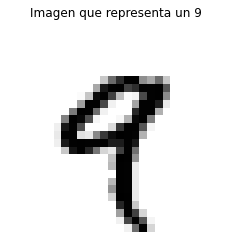

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
instancia = 4
some_digit = X[instancia]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.title('Imagen que representa un {}'.format(y[instancia])) 
plt.show()

Esto parece un 5 y, de hecho, eso es lo que nos dice la etiqueta:

In [7]:
y[4]

'9'

In [8]:
type(y[4])

str

Tenga en cuenta que la etiqueta es una cadena.

La mayoría de los algoritmos de ML esperan números, así que transformemos la variable `y` a tipo de número entero:
    

In [9]:
import numpy as np 
y = y.astype(np.int32) # convierte todas las entradas del vector y en enteros   

In [10]:
y[4] 

9

Para darle una idea de la complejidad de la tarea de clasificación, el siguiente código muestra algunas imágenes más del conjunto de datos MNIST.

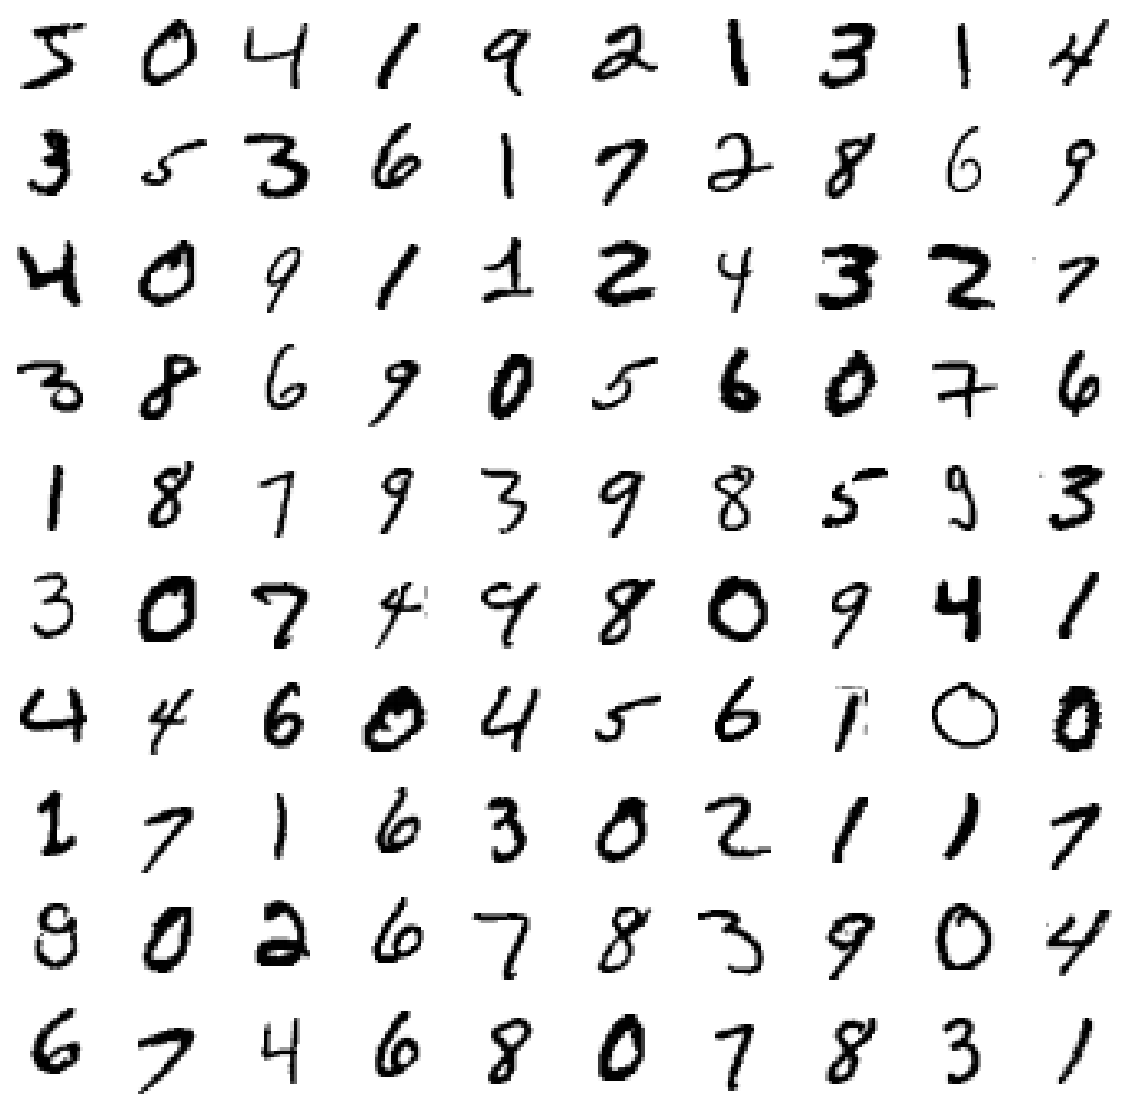

In [11]:
import numpy as np 
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(10,10, figsize = (20,20))

n_imagen = 0
for i in range(10):
    for j in range(10):
        ax[i,j].imshow(X[n_imagen].reshape(28,28), cmap = 'binary')
        ax[i,j].axis('off') 
        n_imagen+=1

¡Pero espera! Siempre debe crear un conjunto de prueba y dejarlo a un lado antes de inspeccionar los datos de cerca. 

El conjunto de datos MNIST ya está dividido en un conjunto de entrenamiento (las primeras 60.000 imágenes) y un conjunto de prueba (las últimas 10.000 imágenes):

# Dividir en entrenamiento y testeo al dataset dado

<img src = 'https://miro.medium.com/max/1136/1*-8_kogvwmL1H6ooN1A1tsQ.png'>

In [12]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

<img src = 'https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/1_train-test-split_0.jpg'>

El conjunto de entrenamiento ya está barajado para nosotros, 
* lo cual es bueno porque esto garantiza que todos los pliegues de **validación cruzada** serán similares (no desea que a un pliegue le falten algunos dígitos). 

Además, algunos algoritmos de aprendizaje son sensibles al **orden de las instancias de entrenamiento** y 
* funcionan mal si obtienen muchas instancias similares seguidas. 

Mezclar el conjunto de datos garantiza que esto no suceda

## Training a Binary Classifier  

Simplifiquemos el problema por ahora e intentemos identificar solo un dígito, por ejemplo, el número 5.

Este "5-detector" será un ejemplo de un clasificador binario, capaz de distinguir entre solo dos clases,   

* 5 y 
* no 5.

Creemos los **vectores objetivo** para esta tarea de clasificación:

In [13]:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits
y_test_5 = (y_test == 5)

Ahora escojamos un clasificador y entrenemoslo. 

Un buen lugar para comenzar es con un 
* clasificador de Gradiente Descendente Estocástico (SGD), utilizando la clase `SGDClassifier` de Scikit-Learn.

Este clasificador tiene la ventaja de poder manejar conjuntos de datos muy grandes de manera eficiente.

Esto se debe en parte a que SGD se ocupa de las instancias de entrenamiento de forma independiente, 
* una a la vez (lo que también hace que SGD sea adecuado para el aprendizaje en línea), como veremos más adelante.

Vamos a crear un `SGDClassifier` y 
* entrenarlo en todo el conjunto de entrenamiento:

In [14]:
from sklearn.linear_model import SGDClassifier

In [15]:
%%time 
sgd_clf = SGDClassifier(random_state=42) # Instanciar la clase SGDClassifier
sgd_clf.fit(X_train, y_train_5) # alrededor de 21 segundos para entrenar el modelo

CPU times: total: 27.2 s
Wall time: 27.4 s


SGDClassifier(random_state=42)

## Sugerencia 

El `SGDClassifier` se basa en la aleatoriedad durante el entrenamiento 
* (de ahí el nombre "estocástico").

Si desea resultados reproducibles, debe establecer el parámetro `random_state`.

Ahora podemos usarlo para detectar imágenes del número 5:

In [16]:
sgd_clf.predict([X_train[1]])

array([False])

CPU times: total: 2.06 s
Wall time: 2.08 s


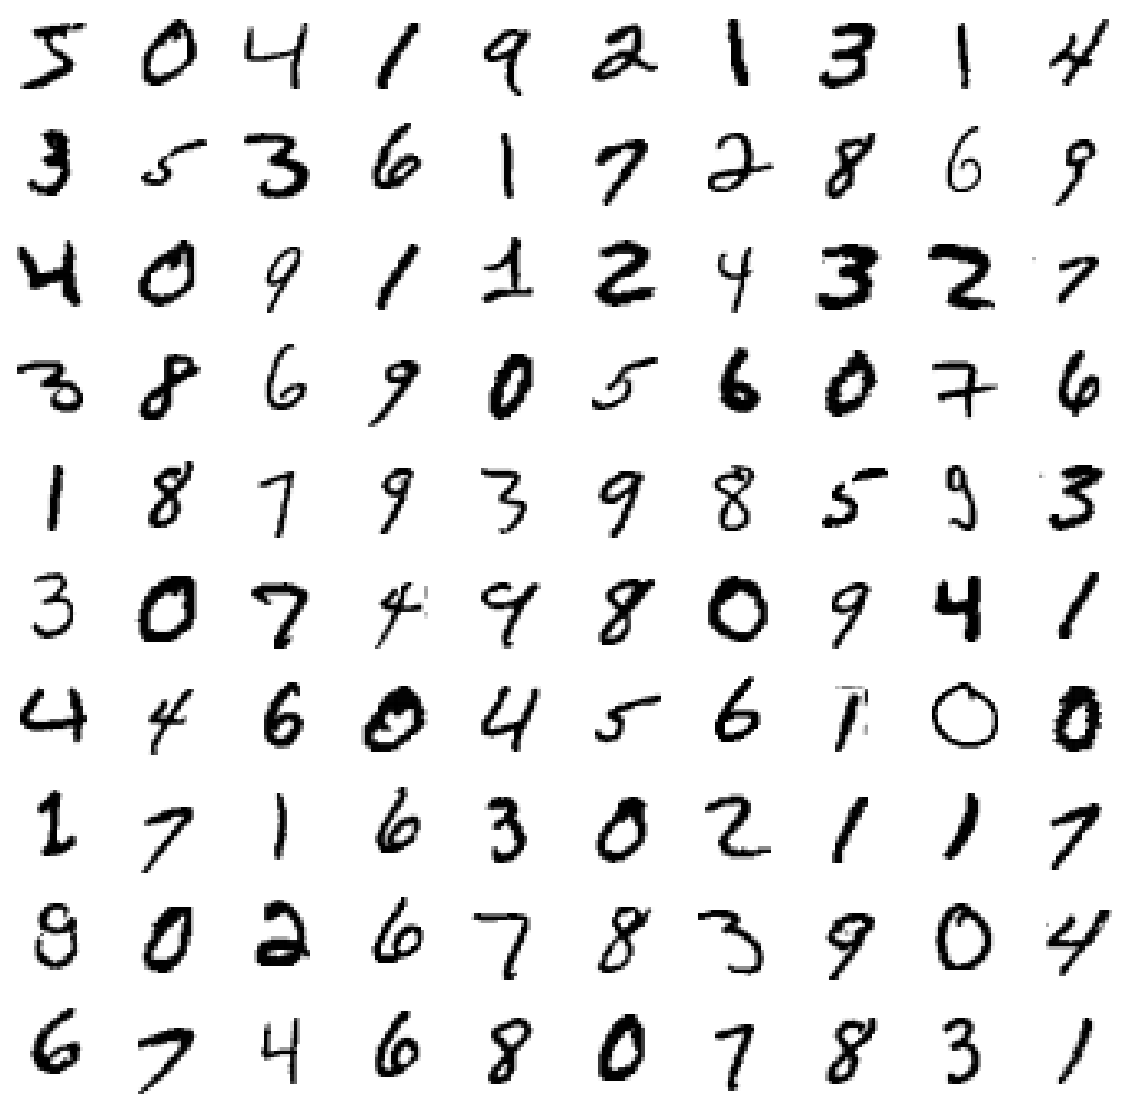

In [17]:
%%time
import numpy as np 
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(10,10, figsize = (20,20))

n_imagen = 0
for i in range(10):
    for j in range(10):
        ax[i,j].imshow(X[n_imagen].reshape(28,28), cmap = 'binary')
        ax[i,j].axis('off') 
        n_imagen+=1

El clasificador adivina que esta imagen representa un 5 (`True`). 

¡Parece que acertó en este caso particular! 
* Ahora, evaluemos el rendimiento de este modelo.

## Medidas de desempeño

Evaluar un **clasificador** suele ser significativamente más complicado que evaluar un **regresor**.

Hay muchas **medidas de rendimiento disponibles**, 
* ¡así que tome otro café y prepárese para aprender muchos conceptos y acrónimos nuevos!

# Medición de la exactitud mediante la validación cruzada 

Una buena forma de evaluar un modelo es utilizar **la validación cruzada**.

## IMPLEMENTING CROSS-VALIDATION  

De vez en cuando, necesitará más control sobre el proceso de validación cruzada que el que ofrece Scikit-Learn.
<img src = 'https://upload.wikimedia.org/wikipedia/commons/f/f2/K-fold_cross_validation.jpg'>

<img src = 'https://scikit-learn.org/stable/_images/grid_search_cross_validation.png'>

En estos casos, puede implementar la validación cruzada usted mismo. 

El siguiente código hace aproximadamente lo mismo que la función `cross_val_score()` de **Scikit-Learn** e imprime el mismo resultado:

In [18]:
%%time 

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=5, random_state=42, shuffle=True) 
# n_splits es el número de subconjuntos en los que se dividirá el conjunto de entrenamiento
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred)) 

0.9598333333333333
0.962
0.9421666666666667
0.9673333333333334
0.9541666666666667
CPU times: total: 1min 25s
Wall time: 1min 23s


La clase StratifiedKFold realiza un muestreo estratificado (como se explica en el Capítulo 2) para producir pliegues que contienen una proporción representativa de cada clase.

En cada iteración, el código crea un clon del clasificador, entrena ese clon en los pliegues de entrenamiento y hace predicciones en el pliegue de prueba.

Luego cuenta el número de predicciones correctas y genera la proporción de predicciones correctas.

Usemos la función `cross_val_score()` para evaluar nuestro modelo `SGDClassifier`, usando la validación cruzada K-fold con tres pliegues.

Recuerde que la validación cruzada de K-fold significa dividir el conjunto de entrenamiento en $K$ pliegues (en este caso, tres), luego hacer predicciones y evaluarlas en cada pliegue usando un modelo entrenado en los pliegues restantes (consulte el Capítulo 2):

In [19]:
%%time 
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=5, scoring="accuracy")


CPU times: total: 1min 15s
Wall time: 1min 13s


array([0.95466667, 0.96975   , 0.9635    , 0.96533333, 0.94841667])

¡Guau! ¿Por encima del $93 \%$ de precisión (proporción de predicciones correctas) en todos los pliegues de validación cruzada?

Esto se ve increíble, ¿no? 
* Bueno, antes de que te emociones demasiado, echemos un vistazo a un clasificador muy tonto que simplemente clasifica cada imagen en la clase "no-5":

In [20]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)


¿Puedes adivinar la precisión de este modelo? Vamos a averiguar:

In [21]:
%%time 
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")


CPU times: total: 1.02 s
Wall time: 668 ms


array([0.91125, 0.90855, 0.90915])

¡Así es, tiene más del 90% de precisión! 
* Esto se debe simplemente a que solo alrededor del $10 \%$ de las imágenes son 5, por lo que si siempre adivina que una imagen no es un 5, acertará aproximadamente el 90 % de las veces.

Vence a Nostradamus.

Esto demuestra por qué la exactitud generalmente **no** es la medida de rendimiento preferida para los clasificadores, 
* especialmente cuando se trata de conjuntos de **datos sesgados** (es decir, cuando algunas clases son mucho más frecuentes que otras, conjuntos de datos desbalanceados).

# Confusion Matrix

Una forma mucho mejor de evaluar el rendimiento de un clasificador es observar la **matriz de confusión**.

La idea general es contar el número de veces que las instancias de la clase A se clasifican como clase B.

Por ejemplo, para saber la cantidad de veces que el clasificador confundió imágenes de 5 con 3, buscaría en la quinta fila y la tercera columna de la matriz de confusión.

Para calcular la matriz de confusión, primero debe tener un conjunto de predicciones para poder compararlas con los objetivos reales.

Podría hacer predicciones sobre el conjunto de prueba, pero no lo toquemos por ahora (recuerde que desea usar el conjunto de prueba solo al final de su proyecto, una vez que tenga un clasificador que esté listo para lanzar).

En su lugar, puedes usar la función `cross_val_predict()`:

In [22]:
%%time 
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=5)

CPU times: total: 1min 13s
Wall time: 1min 11s


Al igual que la función `cross_val_score()`, `cross_val_predict()` realiza una validación cruzada de K-fold, pero en lugar de devolver los puntajes de evaluación, devuelve las predicciones hechas en cada prueba.

Esto significa que obtiene una predicción limpia para cada instancia en el conjunto de entrenamiento ("limpio" significa que la predicción la realiza un modelo que nunca vio los datos durante el entrenamiento).

Ahora está listo para obtener la matriz de confusión usando la función `confusion_matrix()`.

Simplemente pásele las clases objetivo (`y_train_5`) y las clases predichas (`y_train_pred`):

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53115,  1464],
       [  916,  4505]], dtype=int64)

In [24]:
53115 + 1464

54579

In [25]:
53115 + 1454+916+4505

59990

In [26]:
len(X_train)

60000

In [27]:
4505/(4505+916)

0.8310274857037447

Cada fila en una matriz de confusión representa una clase real, mientras que cada columna representa una clase predicha.

* La primera fila de esta matriz considera imágenes que no son 5 (la clase negativa): 53.057 de ellas se clasificaron correctamente como que no son 5 (se denominan verdaderos negativos), 
* mientras que las 1.522 restantes se clasificaron incorrectamente como 5 (falsos positivos).

La segunda fila considera las imágenes de 5s (la clase positiva): 1325 fueron clasificadas erróneamente como no 5s (falsos negativos), mientras que las 4096 restantes fueron clasificadas correctamente como 5s (verdaderos positivos).

Un clasificador perfecto solo tendría verdaderos positivos y verdaderos negativos, por lo que su matriz de confusión tendría valores distintos de cero solo en su diagonal principal (de arriba a la izquierda a abajo a la derecha):

In [28]:
y_train_perfect_predictions = y_train_5 # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)


array([[54579,     0],
       [    0,  5421]], dtype=int64)

# La matriz de confusión en colores

C:\Users\Marco\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


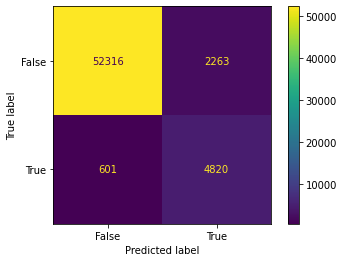

In [29]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(sgd_clf, X_train, y_train_5)  

In [30]:
4820/(4820+2253)

0.6814647250106037

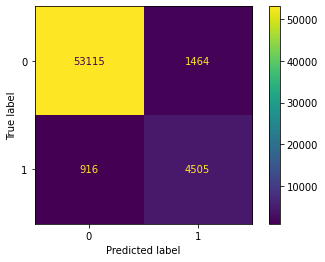

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay
cm  = confusion_matrix(y_train_5, y_train_pred)
dist = ConfusionMatrixDisplay(confusion_matrix= cm)
dist.plot() 
plt.savefig('matriz_confusion_color.png')

La matriz de confusión le brinda mucha información, pero a veces puede preferir una métrica más concisa.

# La precisión de un clasificador 

* Algo interesante para observar es la precisión de las predicciones positivas; 
* esto se llama la precisión del clasificador.

$$ \text{precision} = \frac{TP}{TP + FP} $$

La proporción de los predichos como verdaderos positivos con respecto a todos los que fueron clasificados como positivos. 

Es decir, la precisión se define como el porcentaje de acierto al predecir que una imagen pertenece a la clase positiva. 

$TP$ es el número de verdaderos positivos y $FP$ es el número de falsos positivos.

Una forma trivial de tener una precisión perfecta es hacer una sola predicción positiva y asegurarse de que sea correcta (precisión $= 1/1 = 100 \%$).

Pero esto no sería muy útil, ya que el clasificador ignoraría todas las instancias positivas excepto una.

Por lo tanto, la precisión generalmente se usa junto con otra métrica llamada **recall**(exaustividad), también llamada sensibilidad o tasa positiva verdadera (TPR): esta es la proporción de instancias positivas que el clasificador detecta correctamente.

$$ \text{recall} = \frac{TP}{TP + FN}  $$

$FN$ es, por supuesto, el número de falsos negativos. Es decir, el recall se define como el porcentaje de las imagenes que representaban 5 que detectó.

Si está confundido acerca de la matriz de confusión, la Figura 3-2 puede ayudar.

<img src = 'https://github.com/marco-canas/didactica_ciencia_datos/blob/main/referentes/geron/part_1/c_3/figure_3_2.png?raw=true'>

# Precision and Recall

Scikit-Learn proporciona varias funciones para calcular las métricas del clasificador, incluidas la precisión y el recall:

In [32]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred) # == 4096 / (4096 + 1522)

0.7547327860613168

In [33]:
recall_score(y_train_5, y_train_pred) # == 4096 / (4096 + 1325)


0.8310274857037447

Ahora su 5 - detector no se ve tan brillante como cuando miró su **exactitud** o **accuracy**.

Cuando afirma que una imagen representa un 5, es correcta solo el $75,47 \%$ de las veces.

Además, solo detecta el $83.1 \%$ de los 5s.

A menudo, es conveniente combinar la precisión y el recall en una sola métrica denominada puntuación $F_{1}$, en particular si necesita una forma sencilla de comparar dos clasificadores.

La puntuación $F_{1}$ es la media armónica de precisión y recuperación (Ecuación 3-3).

Mientras que la media regular trata todos los valores por igual, la media armónica da mucho más peso a los valores bajos.

Como resultado, el clasificador solo obtendrá una puntuación alta de $F_{1}$ si tanto la recuperación como la precisión son altas.

$$ F_{1} = \frac{2}{\frac{1}{\text{precision}} + \frac{1}{\text{recall}}} = 2\cdot \frac{\text{precision} \times \text{recall}}{\text{precision} + \text{recall}}  $$

Para calcular la puntuación $F_{1}$, simplemente llame a la función `f1_score()`:

In [34]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.791044776119403

La puntuación $F_{1}$ favorece a los clasificadores que tienen una precisión y recuperación similares.

Esto no siempre es lo que desea: en algunos contextos, lo que más le importa es la precisión, y en otros contextos realmente le importa el recall.

Por ejemplo, 
* si entrenó a un clasificador para detectar **videos que son seguros para los niños**, probablemente preferiría un clasificador que rechace muchos videos buenos (baja recuperación) pero solo mantenga los seguros (alta **precisión**), en lugar de un clasificador que tiene mucho más recuerdo, pero permite que aparezcan algunos videos realmente malos en su producto (en tales casos, es posible que desee agregar una canalización humana para verificar la selección de videos del clasificador).

    Por otro lado, suponga que entrena a un clasificador para **detectar ladrones en imágenes de vigilancia**: 
* probablemente esté bien si su clasificador tiene solo un 30 % de precisión siempre que tenga un 99 % de **recall**.  
* (claro, los guardias de seguridad recibirán algunas alertas falsas, pero casi todos los ladrones serán atrapados).

Desafortunadamente, no puede tener las dos cosas: 
* aumentar la precisión reduce el recall y viceversa.

Esto se llama **equilibrio entre precisión/recuperación**.

## Intercambio de precisión/recuperación

Para comprender esta compensación, veamos cómo SGDClassifier toma sus decisiones de clasificación.

Para cada instancia, calcula una puntuación basada en una función de decisión.

Si esa puntuación es mayor que un umbral, asigna la instancia a la clase positiva; 
* de lo contrario, lo asigna a la clase negativa.

La Figura 3-3 muestra algunos dígitos ubicados desde la puntuación más baja a la izquierda hasta la puntuación más alta a la derecha.

<img src = 'https://github.com/marco-canas/didactica_ciencia_datos/blob/main/referentes/geron/part_1/c_3/figure_3_3.png?raw=true'>

Suponga que el umbral de decisión se coloca en la flecha central (entre los dos 5): 
* encontrará 4 verdaderos positivos (5 reales) a la derecha de ese umbral y 1 falso positivo (en realidad, un 6).

Por tanto, con ese umbral, la precisión es del 80% (4 sobre 5). Pero de los 6 5 reales, el clasificador solo detecta 4, por lo que la recuperación es del 67 % (4 de 6).

Si subes el umbral (muévelo hacia la flecha de la derecha), el falso positivo (el 6) se convierte en un verdadero negativo, aumentando así la precisión (hasta el 100% en este caso), pero un verdadero positivo se convierte en un falso negativo , disminuyendo el recall hasta un 50%.

Por el contrario, bajar el umbral aumenta la recuperación y reduce la precisión.

Scikit-Learn no le permite establecer el umbral directamente, pero le da acceso a los puntajes de decisión que utiliza para hacer predicciones.

En lugar de llamar al método `predict()` del clasificador, puede llamar a su método `decision_function()`, que devuelve una puntuación para cada instancia, y luego usar cualquier umbral que desee para hacer predicciones basadas en esas puntuaciones:

In [35]:
y_scores = sgd_clf.decision_function([X_train[0]])
y_scores

array([2164.22030239])

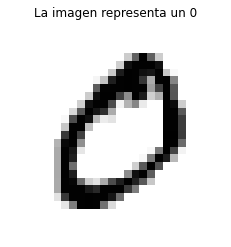

In [36]:
indice_instancia = 1
plt.imshow(X[indice_instancia].reshape(28,28), cmap = 'binary')
plt.title('La imagen representa un {}'.format(y[indice_instancia]))
plt.axis('off')
plt.show() 

In [37]:
threshold = 0 # estableciendo un umbral de decisión
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

El SGDClassifier usa un umbral igual a 0, por lo que el código anterior devuelve el mismo resultado que el método `predict()` (es decir, `True`).

In [38]:
sgd_clf.predict([X[0]])

array([ True])

Subamos el umbral:

In [39]:
threshold = 8000    # estamos moviendo el umbrla de desempeño a la derecha 
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

Esto confirma que elevar el umbral disminuye el recall.

La imagen en realidad representa un 5, y el clasificador lo detecta cuando el umbral es 0, pero lo pierde cuando el umbral aumenta a 8000.

¿Cómo se decide qué umbral usar?

Primero, use la función `cross_val_predict()` para obtener los puntajes de todas las instancias en el conjunto de entrenamiento, pero esta vez especifique que desea obtener puntajes de decisión en lugar de predicciones:

In [40]:
%%time 
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=5, method="decision_function")

CPU times: total: 1min 12s
Wall time: 1min 10s


Con estas puntuaciones, utilice la función `precision_recall_curve()` para calcular la precisión y la recuperación de todos los umbrales posibles:

In [41]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

Finalmente, utilice Matplotlib para trazar la precisión y recordar como funciones del valor de umbral(threshold) (Figura 3-4):

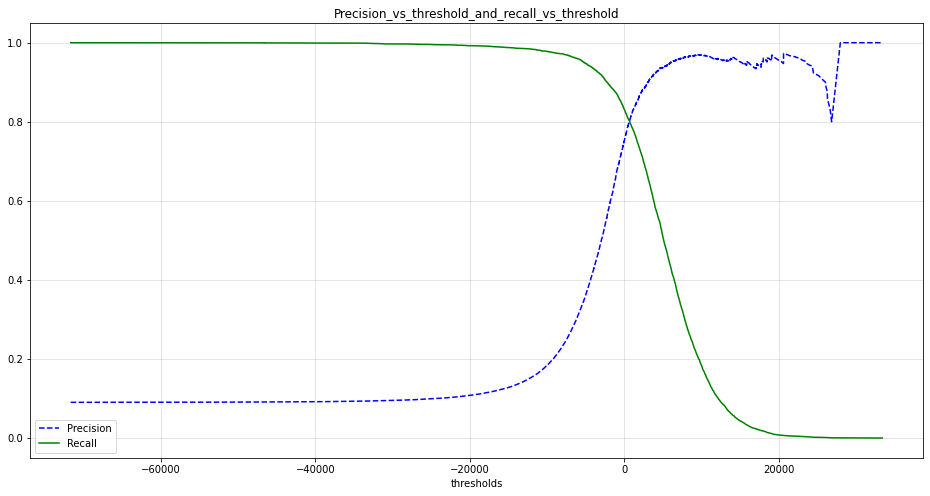

In [42]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize = (16,8))
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlabel('thresholds')
plt.legend() 
plt.grid(alpha = 0.4)
plt.title('Precision_vs_threshold_and_recall_vs_threshold')
plt.savefig('precision_vs_threshold.jpg')
plt.show()

## Nota

Quizás se pregunte por qué la curva de precisión es más irregular que la curva de recuperación de la figura 3-4.

El motivo es que, en ocasiones, la precisión puede disminuir cuando aumenta el umbral (aunque, en general, aumentará).

Para entender por qué, vuelva a mirar la Figura 3-3 y observe lo que sucede cuando comienza desde el umbral central y lo mueve solo un dígito a la derecha: la precisión va de 4/5 (80 %) a 3/4 (75 %). ).

Por otro lado, el recall solo puede disminuir cuando se aumenta el umbral, lo que explica por qué su curva parece suave.

Otra forma de seleccionar una buena compensación de precisión/recuperación es trazar la precisión directamente contra la recuperación, como se muestra en la Figura 3-5 (se resalta el mismo umbral que antes).

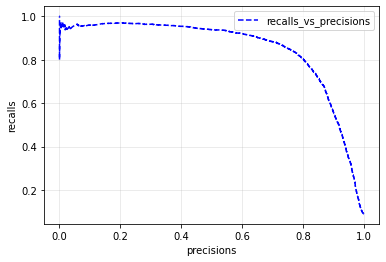

In [43]:
plt.plot( recalls, precisions,  'b--', label = 'recalls_vs_precisions')
plt.xlabel('precisions')
plt.ylabel('recalls')
plt.legend()
plt.savefig('recalls_vs_precisions.png')
plt.grid(alpha = 0.3)
plt.show()

Puede ver que la precisión realmente comienza a caer bruscamente alrededor del 80% de recall.

Probablemente querrá seleccionar una compensación de precisión/recuperación justo antes de esa caída, por ejemplo, alrededor del 60 % de recall.

Pero claro, la elección depende de tu proyecto.

# Construir un modelo con el 90% de precisión

$$ \text{precision} = \frac{TP}{TP + FP} $$

Supongamos que decide apuntar al 90% de precisión.

Busca el primer gráfico y encuentra que necesita usar un umbral de alrededor de $2000$.

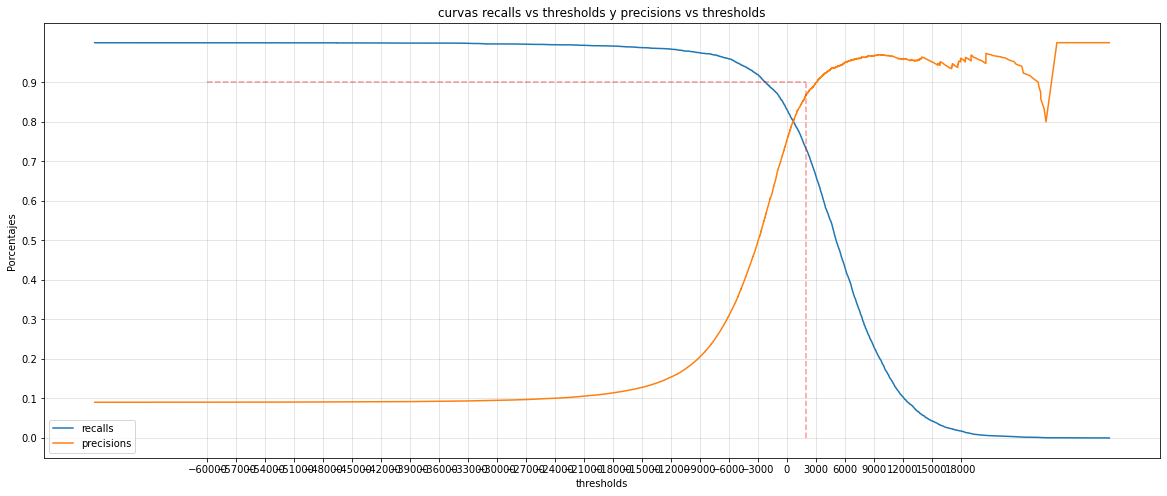

In [87]:
%%time 
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 5, method = 'decision_function')
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
plt.figure(figsize = (20, 8))
plt.plot(thresholds, recalls[:-1], label = 'recalls')
plt.plot(thresholds, precisions[:-1], label = 'precisions')
plt.title('curvas recalls vs thresholds y precisions vs thresholds' )
plt.xlabel('thresholds')
plt.grid(alpha = 0.4)

plt.legend() 
plt.ylabel('Porcentajes') 
plt.xticks(np.arange(-60_000, 20_000, 3_000))
plt.yticks(np.arange(0, 1.0, 0.1))
plt.plot([-60_000, 2_000], [0.9, 0.9], 'r--', alpha = 0.4)
plt.plot([2_000, 2_000], [0.0, 0.9], 'r--', alpha = 0.4)

plt.savefig('recall_vs_thresholds.jpg') 
plt.show() 

Para ser más preciso, puede buscar el umbral más bajo que le proporcione al menos un $90 \%$ de precisión (`np.argmax()` le dará el primer índice del valor máximo, que en este caso significa el primer valor `True`):

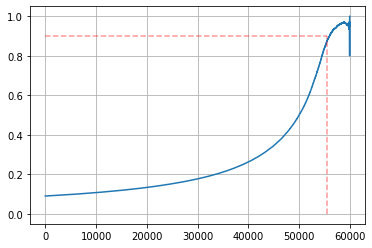

In [75]:
plt.plot(precisions) 
# la función plot de matplotlib grafica indice contra valor cuando solo se entrega un arreglo de numpy
plt.plot([0,55_500], [0.9, 0.9], 'r--', alpha = 0.4)
plt.plot([55_500, 55_500],[0,0.9], 'r--', alpha = 0.4)
plt.grid()
plt.show()

In [76]:
precisions>=0.90

array([False, False, False, ...,  True,  True,  True])

In [78]:
np.argmax(precisions >= 0.90)

55954

In [79]:
len(thresholds)

3302

In [77]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)] # ~7816
threshold_90_precision 

IndexError: index 55954 is out of bounds for axis 0 with size 3302

Para hacer predicciones (en el conjunto de entrenamiento por ahora), en lugar de llamar al método `predict()` del clasificador, puedes ejecutar este código:

In [ ]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

Comprobemos la precisión y el recall de estas predicciones:

In [46]:
precision_score(y_train_5, y_train_pred_90)

0.9002016129032258

In [ ]:
recall_score(y_train_5, y_train_pred_90)

¡Genial, tienes un clasificador con una precisión del 90 %!

Como puede ver, es bastante fácil crear un clasificador con prácticamente cualquier precisión que desee: simplemente establezca un umbral lo suficientemente alto y listo. 

Pero espera, no tan rápido.

¡Un clasificador de alta precisión no es muy útil si su recall es demasiado bajo!

## Sugerencia

Si alguien dice: "Lleguemos al 99 % de precisión", debe preguntar: "¿En qué recall?"

# The ROC Curve

La curva característica de funcionamiento del receptor (ROC) es otra herramienta común utilizada con clasificadores binarios.

Es muy similar a la curva de precisión/recuperación, pero en lugar de trazar precisión versus recuperación, la curva ROC representa la tasa de verdaderos positivos (otro nombre para recuperación) contra la tasa de falsos positivos (FPR).

El FPR es la proporción de instancias negativas que se clasifican incorrectamente como positivas.

Es igual a 1: la tasa negativa verdadera (TNR), que es la proporción de instancias negativas que se clasifican correctamente como negativas.

La TNR también se llama especificidad.

Por lo tanto, la curva ROC traza la sensibilidad (recuerdo) frente a 1 – especificidad.

Para trazar la curva ROC, primero usa la función `roc_curve()` para calcular el TPR y el FPR para varios valores de umbral:

In [48]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

Luego puede trazar el FPR contra el TPR usando Matplotlib.

Este código produce el gráfico de la Figura 3-6:

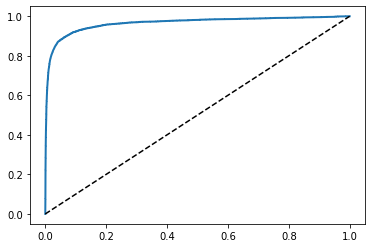

In [49]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
    #[...] # Add axis labels and grid
plot_roc_curve(fpr, tpr)
plt.show()

Una vez más, hay una compensación: cuanto mayor sea el recuerdo (TPR), más falsos positivos (FPR) produce el clasificador.

La línea punteada representa la curva ROC de un clasificador puramente aleatorio; un buen clasificador se mantiene lo más lejos posible de esa línea (hacia la esquina superior izquierda).

Una forma de comparar clasificadores es medir el área bajo la curva (AUC).

Un clasificador perfecto tendrá un ROC AUC igual a 1, mientras que un clasificador puramente aleatorio tendrá un ROC AUC igual a 0,5.

Scikit-Learn proporciona una función para calcular el ROC AUC:

In [50]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9648211175804801

## Sugerencia

Dado que la curva ROC es tan similar a la curva de precisión/recuperación (PR), es posible que se pregunte cómo decidir cuál usar.

Como regla general, debe preferir la curva PR siempre que la clase positiva sea rara o cuando le importen más los falsos positivos que los falsos negativos.

De lo contrario, utilice la curva ROC.

Por ejemplo, si observa la curva ROC anterior (y la puntuación ROC AUC), puede pensar que el clasificador es realmente bueno.

Pero esto se debe principalmente a que hay pocos positivos (5s) en comparación con los negativos (no 5s).

Por el contrario, la curva PR deja claro que el clasificador tiene margen de mejora (la curva podría estar más cerca de la esquina superior izquierda).

Ahora entrenemos un RandomForestClassifier y comparemos su curva ROC y su puntuación ROC AUC con las del SGDClassifier.

Primero, debe obtener puntajes para cada instancia en el conjunto de entrenamiento.

Pero debido a la forma en que funciona (vea el Capítulo 7), la clase `RandomForestClassifier` no tiene un método `decision_function()`.

En cambio, tiene un método `predict_proba()`.

Los clasificadores de Scikit-Learn generalmente tienen uno u otro, o ambos.

El método `predict_proba()` devuelve una matriz que contiene una fila por instancia y una columna por clase, cada una con la probabilidad de que la instancia dada pertenezca a la clase dada (por ejemplo, 70% de probabilidad de que la imagen represente un 5):

In [51]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
method="predict_proba")

La función `roc_curve()` espera etiquetas y puntajes, pero en lugar de puntajes, puede darle probabilidades de clase.

Usemos la probabilidad de la clase positiva como la puntuación:

In [52]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

Ahora está listo para trazar la curva ROC. También es útil trazar la primera curva ROC para ver cómo se comparan (Figura 3-7):

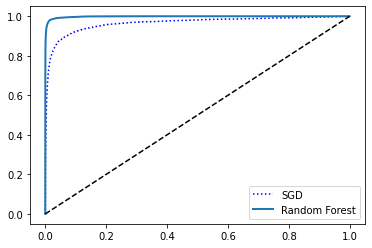

In [53]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

Como puede ver en la Figura 3-7, la curva ROC de `RandomForestClassifier` se ve mucho mejor que la de `SGDClassifier`: se acerca mucho más a la esquina superior izquierda.

Como resultado, su puntaje ROC AUC también es significativamente mejor:

In [54]:
roc_auc_score(y_train_5, y_scores_forest)


0.9983436731328145

Intente medir las puntuaciones de precisión y recuperación: debe encontrar una precisión del 99,0 % y una recuperación del 86,6 %. ¡No está mal!

Ahora sabe cómo:  

* entrenar clasificadores binarios, 
* elegir la métrica adecuada para su tarea, 
* evaluar sus clasificadores mediante la validación cruzada, 
* seleccionar la compensación de precisión/recuperación que se ajuste a sus necesidades y 
* usar curvas ROC y puntajes ROC AUC para comparar varios modelos. .

Ahora tratemos de detectar más que solo los 5s.

# Multiclass Classification

Mientras que los clasificadores binarios distinguen entre dos clases, los clasificadores multiclase (también llamados clasificadores multinomiales) pueden distinguir entre más de dos clases.

Algunos algoritmos (como los clasificadores SGD, los clasificadores Random Forest y los clasificadores Naive Bayes) son capaces de manejar varias clases de forma nativa.

Otros (como los clasificadores de regresión logística o de máquina de vectores de soporte) son clasificadores estrictamente binarios.

Sin embargo, existen varias estrategias que puede utilizar para realizar una clasificación multiclase con varios clasificadores binarios.

Una forma de crear un sistema que pueda clasificar las imágenes de dígitos en 10 clases (del 0 al 9) es entrenar 10 clasificadores binarios, uno para cada dígito (un detector 0, un detector 1, un detector 2, etc.). en).

Luego, cuando desea clasificar una imagen, obtiene el puntaje de decisión de cada clasificador para esa imagen y selecciona la clase cuyo clasificador genera el puntaje más alto.

Esto se denomina estrategia uno contra el resto (OvR) (también llamada uno contra todos).

Otra estrategia es entrenar un clasificador binario para cada par de dígitos: uno para distinguir 0s y 1s, otro para distinguir 0s y 2s, otro para 1s y 2s, y así sucesivamente.

Esto se llama la estrategia uno contra uno (OvO).

Si hay $N$ clases, necesita entrenar $N \times (N – 1) / 2$ clasificadores.

Para el problema MNIST, ¡esto significa entrenar 45 clasificadores binarios!

Cuando desee clasificar una imagen, debe ejecutar la imagen a través de los 45 clasificadores y ver qué clase gana la mayor cantidad de duelos.

La principal ventaja de OvO es que cada clasificador solo necesita ser entrenado en la parte del conjunto de entrenamiento para las dos clases que debe distinguir.

Algunos algoritmos (como los clasificadores de máquinas de vectores de soporte) escalan mal con el tamaño del conjunto de entrenamiento.

Para estos algoritmos, se prefiere OvO porque es más rápido entrenar muchos clasificadores en pequeños conjuntos de entrenamiento que entrenar pocos clasificadores en grandes conjuntos de entrenamiento.

Sin embargo, para la mayoría de los algoritmos de clasificación binaria, se prefiere OvR.

Scikit-Learn detecta cuando intenta utilizar un algoritmo de clasificación binaria para una tarea de clasificación multiclase y automáticamente ejecuta OvR u OvO, según el algoritmo.

Intentemos esto con un clasificador de máquina de vectores de soporte (consulte el Capítulo 5), usando la clase sklearn.svm.SVC:

In [55]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train) # y_train, not y_train_5
svm_clf.predict([some_digit])

array([9])

¡Eso fue fácil! Este código entrena al SVC en el conjunto de entrenamiento usando las clases de destino originales de 0 a 9 (y_train), en lugar de las clases de destino de 5 contra el resto (y_train_5).

Luego hace una predicción (una correcta en este caso).

Debajo del capó, Scikit-Learn en realidad usó la estrategia OvO: entrenó a 45 clasificadores binarios, obtuvo sus puntajes de decisión para la imagen y seleccionó la clase que ganó la mayor cantidad de duelos.

Si llama al método `decision_function()`, verá que devuelve 10 puntuaciones por instancia (en lugar de solo 1).

Esa es una puntuación por clase:

In [56]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[-0.3072346 ,  2.72940761,  2.72002558,  4.87604398,  8.30262765,
         2.7690617 ,  0.697264  ,  7.26676236,  6.27772212,  9.31277815]])

De hecho, la puntuación más alta es la correspondiente a la clase 5:

In [57]:
np.argmax(some_digit_scores)

9

In [58]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [59]:
svm_clf.classes_[5]

5

## WARNING

Cuando se entrena un clasificador, almacena la lista de clases objetivo en su atributo `classes_`, ordenadas por valor.

En este caso, el índice de cada clase en la matriz `classes_` coincide convenientemente con la clase misma (por ejemplo, la clase en el índice 5 resulta ser la clase 5), pero en general no tendrá tanta suerte.

Si desea forzar a Scikit-Learn a usar uno contra uno o uno contra el resto, puede usar las clases `OneVsOneClassifier` o `OneVsRestClassifier`.

Simplemente cree una instancia y pase un clasificador a su constructor (ni siquiera tiene que ser un clasificador binario).

Por ejemplo, este código crea un clasificador multiclase usando la estrategia OvR, basado en un SVC:

In [60]:
%%time
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])

CPU times: total: 28min 37s
Wall time: 28min 50s


array([9])

In [61]:
len(ovr_clf.estimators_)

10

Entrenar un SGDClassifier (o un RandomForestClassifier) es igual de fácil:

In [62]:
%%time 
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

CPU times: total: 3min 17s
Wall time: 3min 20s


array([9])

Esta vez, Scikit-Learn no tuvo que ejecutar OvR ni OvO porque los clasificadores SGD pueden clasificar directamente las instancias en varias clases.

El método `decision_function()` ahora devuelve un valor por clase.

Veamos la puntuación que el clasificador SGD asignó a cada clase:

In [63]:
sgd_clf.decision_function([some_digit])

array([[-45606.88156161, -20077.79903687, -23620.86693862,
        -11077.35532351,  -8578.08720996,  -7133.8897717 ,
        -27033.93740198,  -8312.88994614,  -3257.29010483,
          2193.22821614]])

Puede ver que el clasificador tiene bastante confianza en su predicción: casi todos los puntajes son en gran parte negativos, mientras que la clase 5 tiene un puntaje de 2412.5.

El modelo tiene una ligera duda respecto a la clase 3, que obtiene una puntuación de 573,5.

Ahora, por supuesto, desea evaluar este clasificador.

Como de costumbre, puede utilizar la validación cruzada. 

Utilice la función `cross_val_score()` para evaluar la precisión del `SGDClassifier`:

In [64]:
%%time 
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

CPU times: total: 5min 21s
Wall time: 5min 22s


array([0.87365, 0.85835, 0.8689 ])

Obtiene más del 84% en todos los pliegues de prueba.

Si usó un clasificador aleatorio, obtendría un 10% de precisión, por lo que no es un puntaje tan malo, pero aún puede hacerlo mucho mejor.

Simplemente escalando las entradas (como se discutió en el Capítulo 2) aumenta la precisión por encima del 89%:

In [65]:
%%time 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

CPU times: total: 13min 25s
Wall time: 13min 28s


array([0.8983, 0.891 , 0.9018])

# Error Analysis

Si se tratara de un proyecto real, ahora seguiría los pasos de la lista de verificación del proyecto de Machine Learning (consulte el Apéndice B).

Exploraría las opciones de preparación de datos, probaría varios modelos (seleccionando los mejores y ajustando sus hiperparámetros usando GridSearchCV) y automatizando tanto como sea posible.

Aquí, asumiremos que ha encontrado un modelo prometedor y desea encontrar formas de mejorarlo.

Una forma de hacerlo es analizar los tipos de errores que comete.

Primero, mira la matriz de confusión.

Necesitas hacer predicciones usando la función `cross_val_predict()`, luego llama a la función `confusion_matrix()`, tal como lo hiciste antes:

In [66]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

Eso es un montón de números.

A menudo es más conveniente mirar una representación de imagen de la matriz de confusión, usando la función `matshow()` de Matplotlib:

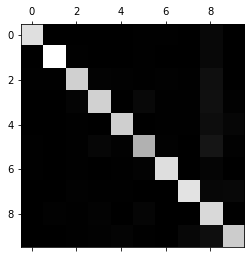

In [67]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

Esta matriz de confusión se ve bastante bien, ya que la mayoría de las imágenes están en la diagonal principal, lo que significa que se clasificaron correctamente.

Los 5 se ven un poco más oscuros que los otros dígitos, lo que podría significar que hay menos imágenes de 5 en el conjunto de datos o que el clasificador no funciona tan bien en 5 como en otros dígitos.

De hecho, puedes verificar que ambos son el caso.

Centremos la trama en los errores.

Primero, debe dividir cada valor en la matriz de confusión por la cantidad de imágenes en la clase correspondiente para que pueda comparar las tasas de error en lugar de números absolutos de errores (lo que haría que las clases abundantes se vean injustamente mal):

In [68]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

Rellene la diagonal con ceros para mantener solo los errores y grafique el resultado:

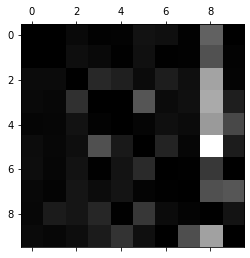

In [69]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

Puede ver claramente los tipos de errores que comete el clasificador.

Remember that rows represent actual classes, while columns represent predicted classes.

La columna para la clase 8 es bastante brillante, lo que indica que muchas imágenes se clasifican erróneamente como 8s.

Sin embargo, la fila para la clase 8 no es tan mala, lo que indica que los 8 reales en general se clasifican correctamente como 8.

Como puede ver, la matriz de confusión no es necesariamente simétrica.

También puede ver que los 3 y los 5 a menudo se confunden (en ambas direcciones).

El análisis de la matriz de confusión a menudo le brinda información sobre las formas de mejorar su clasificador.

Mirando este gráfico, parece que sus esfuerzos deben dedicarse a reducir los 8 falsos.

Por ejemplo, podría intentar recopilar más datos de entrenamiento para dígitos que parecen 8 (pero no lo son) para que el clasificador pueda aprender a distinguirlos de los 8 reales.

O podría diseñar nuevas funciones que ayudarían al clasificador, por ejemplo, escribir un algoritmo para contar la cantidad de bucles cerrados (por ejemplo, 8 tiene dos, 6 tiene uno, 5 no tiene ninguno).

O puede preprocesar las imágenes (por ejemplo, usando Scikit-Image, Pillow u OpenCV) para hacer que algunos patrones, como los bucles cerrados, se destaquen más.

Analizar errores individuales también puede ser una buena manera de obtener información sobre lo que está haciendo su clasificador y por qué está fallando, pero es más difícil y requiere más tiempo.

Por ejemplo, grafiquemos ejemplos de 3 y 5 (la función `plot_digits()` solo usa la función imshow() de Matplotlib; consulte el cuaderno Jupyter de este capítulo para obtener más detalles):

NameError: name 'plot_digits' is not defined

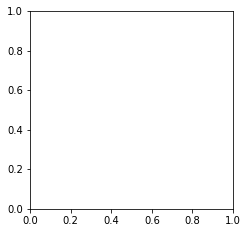

In [70]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

Los dos bloques de 5 × 5 de la izquierda muestran dígitos clasificados como 3 y los dos bloques de 5 × 5 de la derecha muestran imágenes clasificadas como 5.

Algunos de los dígitos en los que el clasificador se equivoca (es decir, en los bloques de abajo a la izquierda y arriba a la derecha) están tan mal escritos que incluso un ser humano tendría problemas para clasificarlos (por ejemplo, el 5 en la primera fila y la segunda columna realmente parece como un mal escrito 3).

Sin embargo, la mayoría de las imágenes mal clasificadas nos parecen errores obvios, y es difícil entender por qué el clasificador cometió los errores que cometió.

La razón es que usamos un SGDClassifier simple, que es un modelo lineal.

Todo lo que hace es asignar un peso por clase a cada píxel, y cuando ve una nueva imagen simplemente suma las intensidades de píxel ponderadas para obtener una puntuación para cada clase. 

Entonces, dado que 3s y 5s difieren solo en unos pocos píxeles, este modelo los confundirá fácilmente.

La principal diferencia entre 3s y 5s es la posición de la pequeña línea que une la línea superior con el arco inferior.

Si dibuja un 3 con la unión ligeramente desplazada hacia la izquierda, el clasificador podría clasificarlo como un 5 y viceversa.

En otras palabras, este clasificador es bastante sensible al desplazamiento y rotación de imágenes.

Entonces, una forma de reducir la confusión de 3/5 sería preprocesar las imágenes para asegurarse de que estén bien centradas y no demasiado giradas.

Esto probablemente también ayudará a reducir otros errores.

# Multilabel Classification

Hasta ahora, cada instancia siempre se ha asignado a una sola clase.

En algunos casos, es posible que desee que su clasificador genere múltiples clases para cada instancia.

Considere un clasificador de reconocimiento facial: ¿qué debería hacer si reconoce a varias personas en la misma imagen?

Debe adjuntar una etiqueta por persona que reconozca.

Digamos que el clasificador ha sido entrenado para reconocer tres caras, Alice, Bob y Charlie.

Luego, cuando al clasificador se le muestre una imagen de Alice y Charlie, debería generar [1, 0, 1] (que significa "Alice sí, Bob no, Charlie sí").

Un sistema de clasificación de este tipo que genera múltiples etiquetas binarias se denomina sistema de clasificación de múltiples etiquetas.

Todavía no entraremos en el reconocimiento facial, pero veamos un ejemplo más simple, solo con fines ilustrativos:

In [ ]:
%%time 
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

Este código crea una matriz `y_multilabel` que contiene dos etiquetas objetivo para cada imagen de dígito: 
* la primera indica si el dígito es grande o no (7, 8 o 9) y la segunda indica si es impar o no.

Las siguientes líneas crean una instancia `KNeighborsClassifier` (que admite clasificación multietiqueta, aunque no todos los clasificadores lo hacen), y la entrenamos usando la matriz de objetivos múltiples.

Ahora puede hacer una predicción y notar que genera dos etiquetas:

In [ ]:
knn_clf.predict([some_digit])

¡Y lo hace bien! De hecho, el dígito 5 no es grande (Falso) e impar (Verdadero).

Hay muchas formas de evaluar un clasificador de etiquetas múltiples, y seleccionar la métrica correcta realmente depende de su proyecto.

Un enfoque es medir la puntuación $F_{1}$ para cada etiqueta individual (o cualquier otra métrica de clasificador binario discutida anteriormente), luego simplemente calcular la puntuación promedio.

Este código calcula la puntuación media de $F_{1}$ en todas las etiquetas:

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

Sin embargo, esto supone que todas las etiquetas son igualmente importantes, lo que puede no ser el caso.

En particular, si tiene muchas más imágenes de Alicia que de Bob o Charlie, es posible que desee dar más peso a la puntuación del clasificador en las imágenes de Alicia.

Una opción simple es dar a cada etiqueta un peso igual a su soporte (es decir, el número de instancias con esa etiqueta de destino).

Para hacer esto, simplemente configure `average="weighted"` en el código anterior

# Multioutput Classification

El último tipo de tarea de clasificación que vamos a discutir aquí se llama clasificación multisalida-multiclase (o simplemente clasificación multisalida).

Es simplemente una generalización de la clasificación multietiqueta donde cada etiqueta puede ser multiclase (es decir, puede tener más de dos valores posibles).

Para ilustrar esto, construyamos un sistema que elimine el ruido de las imágenes.

Tomará como entrada una imagen de dígito ruidosa y (con suerte) generará una imagen de dígito limpia, representada como una matriz de intensidades de píxeles, al igual que las imágenes MNIST.

Notice that the classifier’s output is multilabel (one label per pixel) and each label can have multiple values (pixel intensity ranges from 0 to 255). 

Por lo tanto, es un ejemplo de un sistema de clasificación de múltiples salidas.

## NOTA

La línea entre clasificación y regresión a veces es borrosa, como en este ejemplo.

Podría decirse que predecir la intensidad de los píxeles es más parecido a una regresión que a una clasificación.

Además, los sistemas multisalida no se limitan a tareas de clasificación; incluso podría tener un sistema que genere varias etiquetas por instancia, incluidas las etiquetas de clase y las etiquetas de valor.

Comencemos creando los conjuntos de entrenamiento y prueba tomando las imágenes MNIST y agregando ruido a sus intensidades de píxeles con la función `randint()` de NumPy.

Las imágenes de destino serán las imágenes originales:

In [ ]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train # !cómo es posible que las etiquatas sean las imágenes¡
y_test_mod = X_test

Echemos un vistazo a una imagen del conjunto de prueba (sí, estamos husmeando en los datos de prueba, por lo que debería estar frunciendo el ceño en este momento):

A la izquierda está la imagen de entrada ruidosa y a la derecha está la imagen de destino limpia.

Ahora entrenemos el clasificador y hagamos que limpie esta imagen:

In [ ]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)

¡Parece lo suficientemente cerca del objetivo! Con esto concluye nuestro recorrido de clasificación.

Ahora debe saber cómo seleccionar buenas métricas para las tareas de clasificación, elegir la compensación adecuada de precisión/recuperación, comparar clasificadores y, en general, crear buenos sistemas de clasificación para una variedad de tareas.

# Ejercicios

1. Intente crear un clasificador para el conjunto de datos MNIST que logre una precisión superior al 97 % en el conjunto de prueba.

**Sugerencia**: `KNeighborsClassifier` funciona bastante bien para esta tarea; solo necesita encontrar buenos valores de hiperparámetros (pruebe una búsqueda de cuadrícula en los hiperparámetros de pesos y n_neighbors).

2. Escriba una función que pueda desplazar una imagen MNIST en cualquier dirección (izquierda, derecha, arriba o abajo) en un píxel. Luego, para cada imagen en el conjunto de entrenamiento, cree cuatro copias desplazadas (una por dirección) y agréguelas al conjunto de entrenamiento. Finalmente, entrene a su mejor modelo en este conjunto de entrenamiento ampliado y mida su precisión en el conjunto de prueba. ¡Debe observar que su modelo funciona aún mejor ahora! Esta técnica de hacer crecer artificialmente el conjunto de entrenamiento se denomina aumento de datos o expansión del conjunto de entrenamiento.

3. Aborde el conjunto de datos del Titanic. Un gran lugar para comenzar es Kaggle.

4. Cree un clasificador de spam (un ejercicio más desafiante): descargue ejemplos de spam y ham de los conjuntos de datos públicos de Apache SpamAssassin. Descomprima los conjuntos de datos y familiarícese con el formato de datos.

Divida los conjuntos de datos en un conjunto de entrenamiento y un conjunto de prueba.

Escriba una canalización de preparación de datos para convertir cada correo electrónico en un vector de funciones. Su proceso de preparación debe transformar un correo electrónico en un vector (escaso) que indique la presencia o ausencia de cada palabra posible.

Por ejemplo, si todos los correos electrónicos solo contienen cuatro palabras, "Hola", "cómo", "eres", "tú", entonces el correo electrónico "Hola, hola, hola" se convertiría en un vector [1, 0, 0 , 1] (que significa [“Hola” está presente, “cómo” está ausente, “eres” está ausente, “usted” está presente]), o [3, 0, 0, 2] si prefiere contar el número de ocurrencias de cada palabra.

Es posible que desee agregar hiperparámetros a su proceso de preparación para controlar si eliminar o no los encabezados de los correos electrónicos, convertir cada correo electrónico a minúsculas, eliminar la puntuación, reemplazar todas las URL con "URL", reemplazar todos los números con "NÚMERO" o incluso realizar lematización. (es decir, recorte las terminaciones de las palabras; hay bibliotecas de Python disponibles para hacer esto).

Finalmente, pruebe varios clasificadores y vea si puede crear un gran clasificador de spam, con alta recuperación y alta precisión.

Las soluciones a estos ejercicios se pueden encontrar en los cuadernos Jupyter disponibles en https://github.com/ageron/handson-ml2.

## Referentes  

* Graficar la matriz de confución como un mapa de calor: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html

* Clase de Sklearn para dibujar la matriz de confusión en colores: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

* Del canal dot csv explicación sobre el algoritmo del decenso del gradiente: https://www.youtube.com/watch?v=A6FiCDoz8_4&t=391s
* La función imshow() de matplotlib: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html

